## # Introduction
<p><img src="https://assets.datacamp.com/production/project_1010/img/book_cover.jpg" alt="The book cover of Peter and Wendy" style="width:183;height:253px;"></p>
<h3 id="flyawaywithpeterpan">Fly away with Peter Pan!</h3>
<p>Peter Pan has been the companion of many children, and went a long way, starting as a Christmas play and ending up as a Disney classic. Did you know that although the play was titled "Peter Pan, Or The Boy Who Wouldn't Grow Up", J. M. Barrie's novel was actually titled "Peter and Wendy"? </p>
<p>You're going to explore and analyze Peter Pan's text to answer the question in the instruction pane below. You are working with the text version available here at <a href="https://www.gutenberg.org/files/16/16-h/16-h.htm">Project Gutenberg</a>. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. <a href="https://www.datacamp.com/courses/intermediate-importing-data-in-python">Intermediate Importing Data in Python</a> and <a href="https://www.datacamp.com/courses/introduction-to-natural-language-processing-in-python">Introduction to Natural Language Processing in Python</a> teach the skills required to complete this project. Should you decide to use them, English stopwords have been downloaded from <code>nltk</code> and are available for you in your environment.</p>

In [71]:

import requests ##lets us send https request to get things from the web, thats where the text is
import nltk ##natural lang processing libary
from bs4 import BeautifulSoup ##let us scrap info from a website
from collections import Counter ##gives access to the counter object varriable type (dict plus)
                            ##key values are int only


In [72]:
##get the html code
r=requests.get('https://www.gutenberg.org/files/16/16-h/16-h.htm') 
print(r) ## response 200 means ok it worked 

r.encoding = "utf-8" ##r inlcudes different info like url but we need to set the encoding ourselves,it says it on the website page

html = r.text ##extraciting the text of the html doc

print(html[:2000])



<Response [200]>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg eBook of Peter Pan, by James M. Barrie</title>

<style type="text/css">

body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify; }

h1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}
h3 {font-size: 130%; margin-top: 1em;}
h4 {font-size: 120%;}
h5 {font-size: 110%;}

.no-break {page-break-before: avoid;} /* for epubs */

d

In [73]:
##now we want the unicode of the html doc

soup = BeautifulSoup(html)

##now to get the text
text = soup.text

print(text[:2000])

## we will not worry about getting ride of the none book sections here because it will not impact our work 






The Project Gutenberg eBook of Peter Pan, by James M. Barrie


body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify; }

h1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}
h3 {font-size: 130%; margin-top: 1em;}
h4 {font-size: 120%;}
h5 {font-size: 110%;}

.no-break {page-break-before: avoid;} /* for epubs */

div.chapter {page-break-before: always; margin-top: 4em;}

hr {width: 80%; margin-top: 2em; margin-bottom: 2em;}

p {text-indent: 1em;
   margin-top: 0.25em;
   margin-bottom: 0.25em; }

p.poem {text-indent: 0%;
        margin-left: 10%;
        font-size: 90%;
        margin-top: 1em;
        margin-bottom: 1em; }

p.letter {text-indent: 0%;
          margin-left

In [74]:
## tokenizing the text

tokenizer = nltk.tokenize.RegexpTokenizer('\w+') ## consider one or more characters a tokin or word look at nltk so see other options

tokens = tokenizer.tokenize(text)

print(tokens[:6])  ## shows the first 6 words




['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Peter']


In [75]:
##we want Petter and petter to be seen as the same word so we will make all words lowercase

words = [token.lower() for token in tokens] ## lower case al tokens in token

print(words[:6])

['the', 'project', 'gutenberg', 'ebook', 'of', 'peter']


In [76]:
## we first want to remove words that are not meaniful like a or the as they wont teach us anything in this case
 ##these words are called stopwords
##if this was local we would need to run the bellow code, but here on datacamp its already done
##nltk.download('stopwords')

In [77]:
stop_words = nltk.corpus.stopwords.words("english") ##gives a list of english stop words

print(stop_words[:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [78]:
##Now to remove the stop words

words_clean = [word for word in words if word not in stop_words]

print(words_clean[:6])

['project', 'gutenberg', 'ebook', 'peter', 'pan', 'james']


In [79]:
count = Counter(words_clean)
top_ten = count.most_common(10) ##stores the words and the number of occurances
print(top_ten)

[('peter', 409), ('wendy', 362), ('said', 358), ('would', 217), ('one', 212), ('hook', 174), ('could', 142), ('cried', 136), ('john', 133), ('time', 126)]


In [80]:
##print which ones where names 
protagonists = ["peter","wendy","hook","john"]

## done!!!!


In [81]:
##now we can clean up the text file becuase we have time
## basicaly just count how many where there and trim them
trimmed_text = text[3163:]
print(trimmed_text[:1000])





Chapter I.
PETER BREAKS THROUGH

All children, except one, grow up. They soon know that they will grow up, and
the way Wendy knew was this. One day when she was two years old she was playing
in a garden, and she plucked another flower and ran with it to her mother. I
suppose she must have looked rather delightful, for Mrs. Darling put her hand
to her heart and cried, “Oh, why can’t you remain like this for
ever!” This was all that passed between them on the subject, but
henceforth Wendy knew that she must grow up. You always know after you are two.
Two is the beginning of the end.


Of course they lived at 14, and until Wendy came her mother was the chief one.
She was a lovely lady, with a romantic mind and such a sweet mocking mouth. Her
romantic mind was like the tiny boxes, one within the other, that come from the
puzzling East, however many you discover there is always one more; and her
sweet mocking mouth had one kiss on it that Wendy could never get, though the


Text(0.5, 1.0, "Peter Pan's most common words")

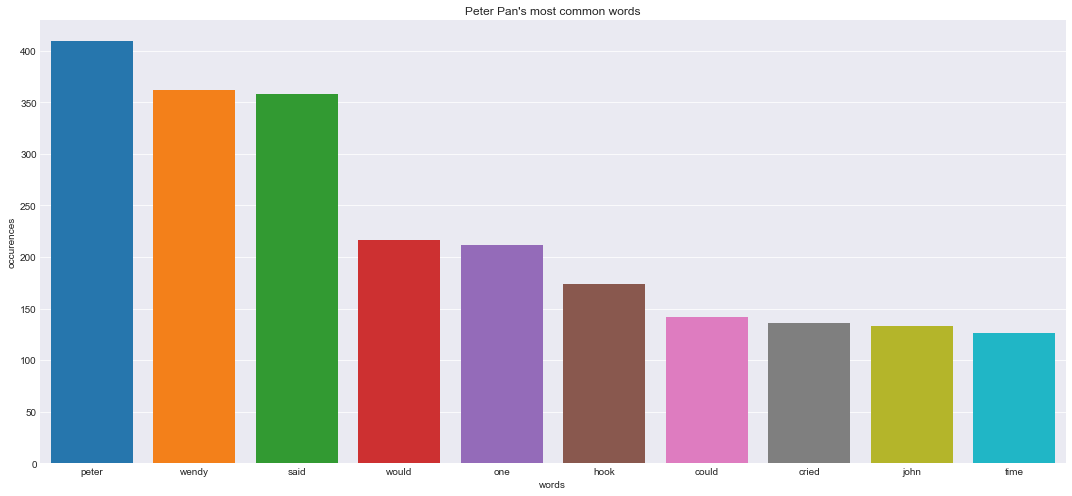

In [82]:
## now lets make a viz for fun
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.DataFrame(top_ten,columns=["words","occurences"])
sns.set_style("darkgrid")
plt.figure(figsize= (15,7))
sns.barplot(x="words",
            y="occurences",
            data=df,
            saturation=0.9).set_title("Peter Pan's most common words")